# 대략적 진행 개요

1. csv 파일 pandas를 이용해서 read_csv하기

2. adult 데이터 feature 분석하기

3. 분석한 feature에서 데이터 선별

4. 선별된 데이터에서 무의미 데이터, NaN 데이터 대체 (outlier, null)

5. 스케일러를 사용하여 데이터 전처리

6. 분류기 작성 및 학습

7. 테스트 및 평가

## 필요 모듈 import

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score , cross_validate

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score , recall_score , f1_score , roc_auc_score , confusion_matrix

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer

import graphviz
from sklearn.tree import export_graphviz
from IPython.display import display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## read csv

In [2]:
%matplotlib inline

adult_train = pd.read_csv('./adult_data/adult_data.csv')
adult_test = pd.read_csv('./adult_data/adult_test.csv')
adult_train.head(3)
adult_test.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.


## Feature Analysis

In [3]:
workclass = [' Private',' Self-emp-not-inc',' Self-emp-inc',' Federal-gov',' Local-gov',' State-gov',' Without-pay',' Never-worked.']

education = [' Bachelors',' Some-college',' 11th',' HS-grad',' Prof-school',' Assoc-acdm',' Assoc-voc',' 9th',' 7th-8th',' 12th',' Masters',' 1st-4th',' 10th',' Doctorate',' 5th-6th',' Preschool']

marital_status = [' Married-civ-spouse',' Divorced',' Never-married',' Separated',' Widowed',' Married-spouse-absent',' Married-AF-spouse']

occupation = [' Tech-support',' Craft-repair',' Other-service',' Sales',' Exec-managerial',' Prof-specialty',' Handlers-cleaners',' Machine-op-inspct',' Adm-clerical',' Farming-fishing',' Transport-moving',' Priv-house-serv',' Protective-serv',' Armed-Forces']
    
relationship= [' Wife',' Own-child',' Husband',' Not-in-family',' Other-relative',' Unmarried']
    
race = [' White',' Asian-Pac-Islander',' Amer-Indian-Eskimo',' Other',' Black']

sex = [' Female',' Male']
    
native_country = [' United-States',' Cambodia',' England',' Puerto-Rico',' Canada',' Germany',' Outlying-US(Guam-USVI-etc)',' India',' Japan',' Greece',' South',' China',' Cuba',' Iran',' Honduras',' Philippines',' Italy',' Poland',' Jamaica',' Vietnam',' Mexico',' Portugal',' Ireland',' France',' Dominican-Republic',' Laos',' Ecuador',' Taiwan',' Haiti',' Columbia',' Hungary',' Guatemala',' Nicaragua',' Scotland',' Thailand',' Yugoslavia',' El-Salvador',' Trinadad&Tobago',' Peru',' Hong', 'Holand-Netherlands']

========================Features========================<br>
- income >50K, <=50K.<br>
1. <b>age</b>: continuous.<br>
2. <b>workclass</b>: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.<br>
3. <b>fnlwgt</b>: continuous. #final weight<br>
4. <b>education</b>: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.<br>
5. <b>education-num</b>: continuous.<br>
6. <b>marital-status</b>: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.<br>
7. <b>occupation</b>: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.<br>
8. <b>relationship</b>: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.<br>
9. <b>race</b>: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.<br>
10. <b>sex</b>: Female, Male.<br>
11. <b>capital-gain</b>: continuous. #자본 이득<br>
12. <b>capital-loss</b>: continuous.  #자본 손실<br>
13. <b>hours-per-week</b>: continuous.<br>
14. <b>native-country</b>: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.<br>

=========================================<br>
Class Distribution:<br>
Probability for the label '>50K' : 23.93% / 24.78% (without unknowns)<br>
Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)<br>
=========================================<br>
Missing Attribute Values:<br>
7% have missing values.<br>

In [4]:
print('\n ### train 데이터 정보 ###  \n')
print(adult_train.info())


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


수정 필요한 feature:
1. <b>workclass</b>
2. <b>education</b>
3. <b>marital-status</b>
4. <b>occupation</b>
5. <b>relationship</b>
6. <b>race</b>
7. <b>sex</b>
8. <b>native-country</b>
9. <b>income</b>


모든 데이터에서 NaN은 ?로 되어있다
=> 이를 NaN으로 바꿀 필요성 존재

?를 NaN으로 치환하여 feature별 NaN 개수를 구해야 한다.

<b>integer type</b>

In [5]:
print(adult_test['age'].value_counts())

35    461
33    460
23    452
36    450
38    437
     ... 
82      3
88      3
85      2
89      2
87      2
Name: age, Length: 73, dtype: int64


In [6]:
print(adult_test['fnlwgt'].value_counts())

136986    9
190290    8
125892    8
203488    8
127651    8
         ..
284701    1
344094    1
75140     1
342049    1
145522    1
Name: fnlwgt, Length: 12787, dtype: int64


In [7]:
print(adult_test['education-num'].value_counts())

9     5283
10    3587
13    2670
14     934
11     679
7      637
12     534
6      456
4      309
15     258
5      242
8      224
16     181
3      176
2       79
1       32
Name: education-num, dtype: int64


In [8]:
print(adult_test['capital-gain'].value_counts())

0        14958
15024      166
7688       126
7298       118
99999       85
         ...  
7896         1
4687         1
6097         1
2036         1
1424         1
Name: capital-gain, Length: 113, dtype: int64


In [9]:
print(adult_test['capital-loss'].value_counts())

0       15518
1902      102
1977       85
1887       74
2415       23
        ...  
2547        1
1594        1
2282        1
1421        1
1911        1
Name: capital-loss, Length: 82, dtype: int64


In [10]:
print(adult_test['hours-per-week'].value_counts())

40    7586
50    1427
45     893
60     702
35     640
      ... 
92       2
89       1
76       1
69       1
79       1
Name: hours-per-week, Length: 89, dtype: int64


<b>object type</b>

In [11]:
print(adult_test['workclass'].value_counts())

 Private             11210
 Self-emp-not-inc     1321
 Local-gov            1043
 ?                     963
 State-gov             683
 Self-emp-inc          579
 Federal-gov           472
 Without-pay             7
 Never-worked            3
Name: workclass, dtype: int64


In [12]:
print(adult_test['education'].value_counts())

 HS-grad         5283
 Some-college    3587
 Bachelors       2670
 Masters          934
 Assoc-voc        679
 11th             637
 Assoc-acdm       534
 10th             456
 7th-8th          309
 Prof-school      258
 9th              242
 12th             224
 Doctorate        181
 5th-6th          176
 1st-4th           79
 Preschool         32
Name: education, dtype: int64


In [13]:
print(adult_test['marital-status'].value_counts())

 Married-civ-spouse       7403
 Never-married            5434
 Divorced                 2190
 Widowed                   525
 Separated                 505
 Married-spouse-absent     210
 Married-AF-spouse          14
Name: marital-status, dtype: int64


In [14]:
print(adult_test['occupation'].value_counts())

 Prof-specialty       2032
 Exec-managerial      2020
 Craft-repair         2013
 Sales                1854
 Adm-clerical         1841
 Other-service        1628
 Machine-op-inspct    1020
 ?                     966
 Transport-moving      758
 Handlers-cleaners     702
 Tech-support          518
 Farming-fishing       496
 Protective-serv       334
 Priv-house-serv        93
 Armed-Forces            6
Name: occupation, dtype: int64


In [15]:
print(adult_test['relationship'].value_counts())

 Husband           6523
 Not-in-family     4278
 Own-child         2513
 Unmarried         1679
 Wife               763
 Other-relative     525
Name: relationship, dtype: int64


In [16]:
print(adult_test['race'].value_counts())

 White                 13946
 Black                  1561
 Asian-Pac-Islander      480
 Amer-Indian-Eskimo      159
 Other                   135
Name: race, dtype: int64


In [17]:
print(adult_test['sex'].value_counts())

 Male      10860
 Female     5421
Name: sex, dtype: int64


In [18]:
print(adult_test['native-country'].value_counts())

 United-States                 14662
 Mexico                          308
 ?                               274
 Philippines                      97
 Puerto-Rico                      70
 Germany                          69
 Canada                           61
 India                            51
 El-Salvador                      49
 China                            47
 Cuba                             43
 England                          37
 South                            35
 Dominican-Republic               33
 Italy                            32
 Haiti                            31
 Portugal                         30
 Japan                            30
 Poland                           27
 Columbia                         26
 Jamaica                          25
 Guatemala                        24
 Greece                           20
 Vietnam                          19
 Ecuador                          17
 Iran                             16
 Nicaragua                        15
 

### drop_columns

In [111]:
adult_train = adult_train.drop(columns = ['sex'],axis = 1)
adult_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,0,0,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,0,40,38,0
32559,22,3,201490,11,9,4,0,3,4,0,0,20,38,0


In [112]:
adult_test = adult_test.drop(columns = ['sex'],axis = 1)
adult_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,7,4,6,3,2,0,0,40,37,0
1,38,3,89814,11,9,2,4,0,4,0,0,50,37,0
2,28,1,336951,7,12,2,10,0,4,0,0,40,37,1
3,44,3,160323,15,10,2,6,0,2,7688,0,40,37,1
4,18,8,103497,15,10,4,14,3,4,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,3,215419,9,13,0,9,1,4,0,0,36,37,0
16277,64,8,321403,11,9,6,14,2,2,0,0,40,37,0
16278,38,3,374983,9,13,2,9,0,4,0,0,50,37,0
16279,44,3,83891,9,13,0,0,3,1,5455,0,40,37,0


?가 존재하는 것은 workclass ,occupation ,native-country

In [78]:
adult_train = adult_train.replace({' ?'},np.nan)
adult_test = adult_test.replace({' ?'},np.nan)
#print(adult_test)

-> null의 개수 : DataFrame.isnull().sum()

In [79]:
print(adult_train.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [80]:
print(adult_test.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


? -> NaN 수정 필요한 feature:
1. <b>workclass</b>
2. <b>occupation</b>
3. <b>native-country</b>

In [81]:
adult_test.head(10)
adult_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int32
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int32
 4   education-num   32561 non-null  int64
 5   marital-status  32561 non-null  int32
 6   occupation      32561 non-null  int32
 7   relationship    32561 non-null  int32
 8   race            32561 non-null  int32
 9   capital-gain    32561 non-null  int64
 10  capital-loss    32561 non-null  int64
 11  hours-per-week  32561 non-null  int64
 12  native-country  32561 non-null  int32
 13  income          32561 non-null  int64
dtypes: int32(7), int64(7)
memory usage: 2.6 MB


## 각 속성별 income과의 관계

이 부분은 진행해도 되고 나중에 진행해도 됩니다.

In [82]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le = le.fit(adult_train['income'])
adult_train['income'] = le.transform(adult_train['income'])

y축 값이 숫자가 되어야 해서 위의 LabelEncoder 한줄 가져와서 income가 >50K, <=50K 인거를 0,1로 바꾼것.

In [51]:
from sklearn import preprocessing

In [52]:
le = preprocessing.LabelEncoder()

In [53]:
le = le.fit(adult_train['income'])

In [54]:
adult_train['income'] = le.transform(adult_train['income'])

In [55]:
adult_train['income']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='income'>

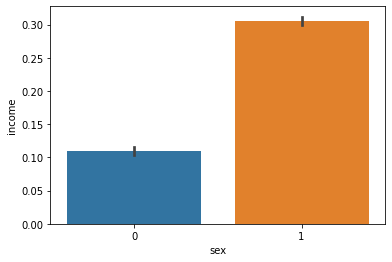

In [56]:
sns.barplot(x='sex', y = 'income', data=adult_train)

<AxesSubplot:xlabel='age', ylabel='income'>

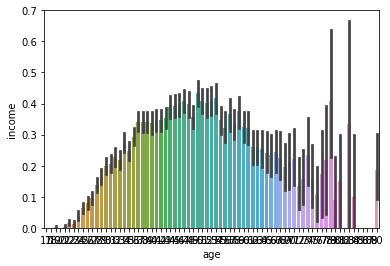

In [57]:
sns.barplot(x='age', y = 'income', data=adult_train)

<AxesSubplot:xlabel='education', ylabel='income'>

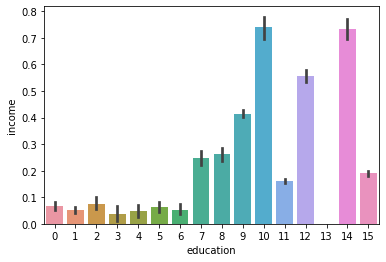

In [58]:
sns.barplot(x='education', y = 'income', data=adult_train)

<AxesSubplot:xlabel='marital-status', ylabel='income'>

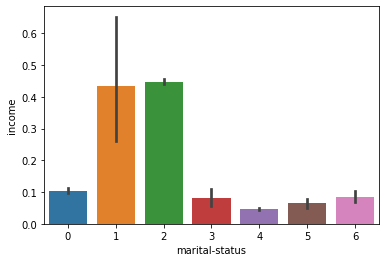

In [59]:
sns.barplot(x='marital-status', y = 'income', data=adult_train)

<AxesSubplot:xlabel='occupation', ylabel='income'>

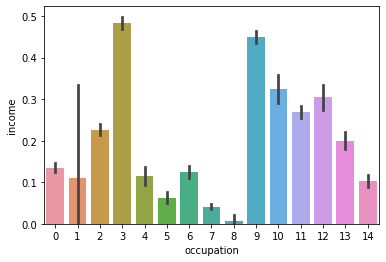

In [60]:
sns.barplot(x='occupation', y = 'income', data=adult_train)

<AxesSubplot:xlabel='relationship', ylabel='income'>

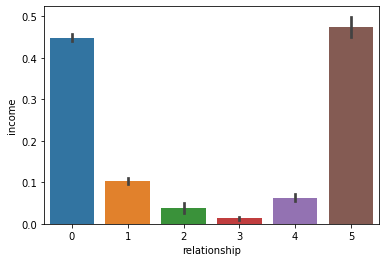

In [61]:
sns.barplot(x='relationship', y = 'income', data=adult_train)

<AxesSubplot:xlabel='race', ylabel='income'>

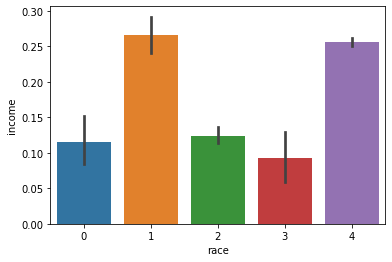

In [62]:
sns.barplot(x='race', y = 'income', data=adult_train)

## Data(Feature) Selection

여기부터 다시 진행

In [83]:
print('데이터 세트 Null 값 갯수 ',adult_train.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


## Data Replacement

NaN을 대체해야 한다!
1. <b>workclass</b>
2. <b>occupation</b>
3. <b>native-country</b>

In [85]:
adult_train['workclass'].fillna('Unknown',inplace=True)
adult_train['occupation'].fillna('Unknown',inplace=True)
adult_train['native-country'].fillna('Unknown',inplace=True)

In [86]:
adult_test['workclass'].fillna('Unknown',inplace=True)
adult_test['occupation'].fillna('Unknown',inplace=True)
adult_test['native-country'].fillna('Unknown',inplace=True)

In [87]:
print('데이터 세트 Null 값 갯수 ',adult_train.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


In [88]:
print('데이터 세트 Null 값 갯수 ',adult_test.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


object 데이터 -> integer label 데이터

In [114]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['workclass', 'education', 'marital-status','occupation','relationship','race','native-country','income']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

adult_train = encode_features(adult_train)
adult_train.head(15)

adult_test = encode_features(adult_test)
adult_test.head(15) 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,7,4,6,3,2,0,0,40,37,0
1,38,3,89814,11,9,2,4,0,4,0,0,50,37,0
2,28,1,336951,7,12,2,10,0,4,0,0,40,37,1
3,44,3,160323,15,10,2,6,0,2,7688,0,40,37,1
4,18,8,103497,15,10,4,14,3,4,0,0,30,37,0
5,34,3,198693,0,6,4,7,1,4,0,0,30,37,0
6,29,8,227026,11,9,4,14,4,2,0,0,40,37,0
7,63,5,104626,14,15,2,9,0,4,3103,0,32,37,1
8,24,3,369667,15,10,4,7,4,4,0,0,40,37,0
9,55,3,104996,5,4,2,2,0,4,0,0,10,37,0


## Feature importance

dt_clf, rf_clf, lr_clf를 fit 한 이후에<br>
해당 tree가 어떤 feature를 중심으로 학습을 진행했는지를 확인하는 코드<br>
이 부분은 classifier를 선언, fit을 진행하고 나서 실행하면 정상 작동합니다.

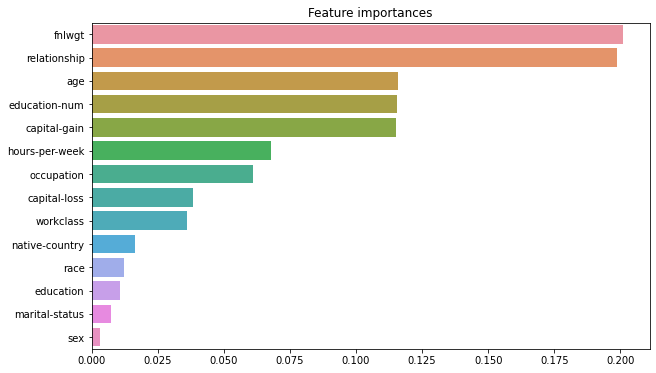

In [91]:
ftr_importances_values = dt_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.show()

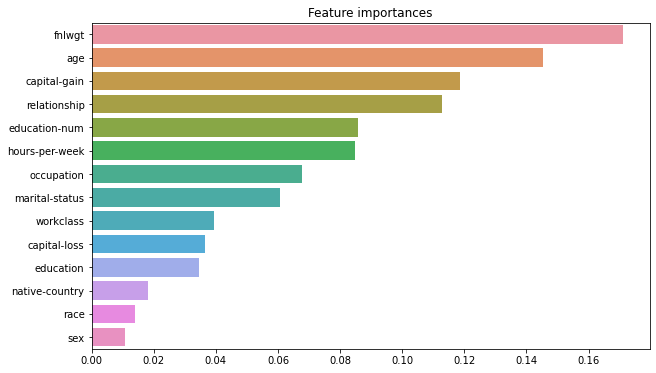

In [50]:
ftr_importances_values = rf_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.show()

Feature: 0, Score: 0.00803
Feature: 1, Score: -0.02139
Feature: 2, Score: -0.00000
Feature: 3, Score: -0.01045
Feature: 4, Score: 0.02899
Feature: 5, Score: -0.03255
Feature: 6, Score: -0.01750
Feature: 7, Score: -0.03576
Feature: 8, Score: -0.00882
Feature: 9, Score: 0.00544
Feature: 10, Score: 0.00033
Feature: 11, Score: 0.00083
Feature: 12, Score: 0.03023
Feature: 13, Score: -0.07027


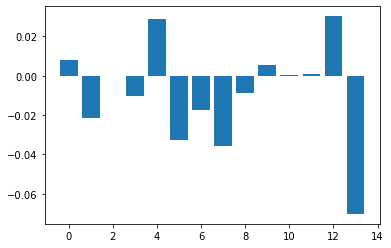

In [51]:
from matplotlib import pyplot
importance = lr_clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

std

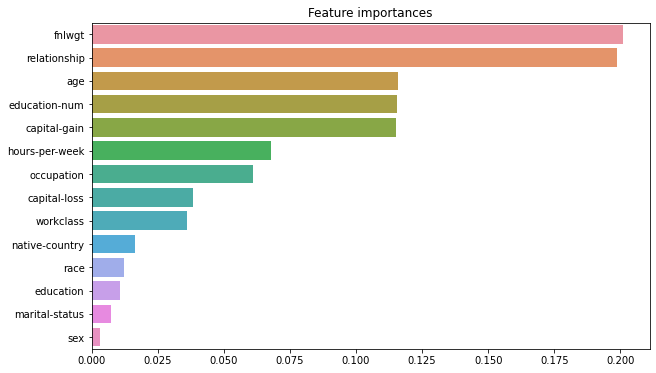

In [79]:
ftr_importances_values = std_dt_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.show()

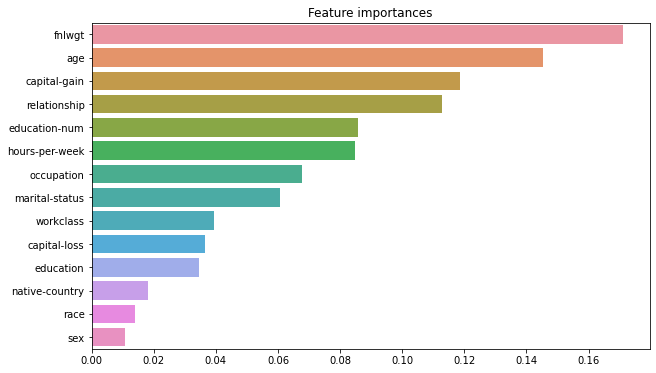

In [80]:
ftr_importances_values = std_rf_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.show()

Feature: 0, Score: 0.48784
Feature: 1, Score: -0.17309
Feature: 2, Score: 0.05132
Feature: 3, Score: 0.05892
Feature: 4, Score: 0.85486
Feature: 5, Score: -0.34542
Feature: 6, Score: -0.01421
Feature: 7, Score: -0.19010
Feature: 8, Score: 0.10566
Feature: 9, Score: 0.43310
Feature: 10, Score: 2.32154
Feature: 11, Score: 0.27235
Feature: 12, Score: 0.36515
Feature: 13, Score: 0.00308


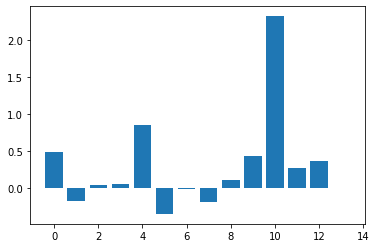

In [81]:
from matplotlib import pyplot
importance = std_lr_clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

mm

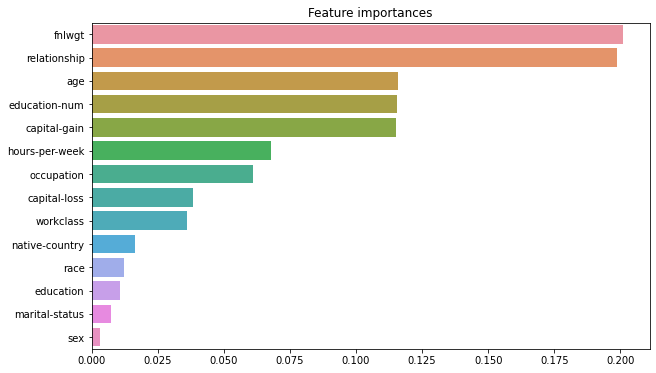

In [82]:
ftr_importances_values = mm_dt_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.show()

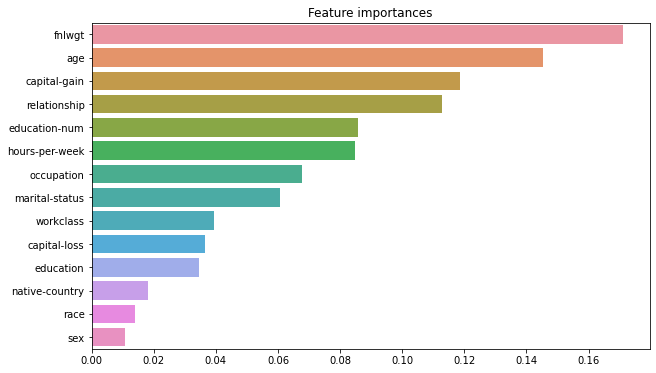

In [83]:
ftr_importances_values = mm_rf_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.show()

Feature: 0, Score: 2.61423
Feature: 1, Score: -0.85169
Feature: 2, Score: 0.67701
Feature: 3, Score: 0.21734
Feature: 4, Score: 4.89932
Feature: 5, Score: -1.34355
Feature: 6, Score: -0.04550
Feature: 7, Score: -0.58225
Feature: 8, Score: 0.47547
Feature: 9, Score: 0.90014
Feature: 10, Score: 18.70362
Feature: 11, Score: 2.73057
Feature: 12, Score: 2.83657
Feature: 13, Score: 0.03151


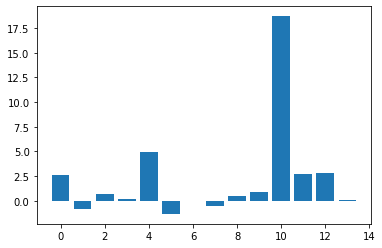

In [84]:
from matplotlib import pyplot
importance = mm_lr_clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Make Train & Test Set

In [115]:
train_x = adult_train.iloc[:,:-1]
train_y = adult_train.iloc[:,-1]
test_x = adult_test.iloc[:,:-1]
test_y = adult_test.iloc[:,-1]

## PreProcessing with Scaler

### 1. StandardScaler

오류 났던 이유: object -> int64로 변환이 진행되지 않았기 때문

In [116]:
std_scaler = StandardScaler()
std_train_x = std_scaler.fit_transform(train_x)
std_test_x = std_scaler.fit_transform(test_x)

In [117]:
std_test_x

array([[-0.99412926, -0.2528865 ,  0.35347399, ..., -0.21806206,
        -0.03143184,  0.2480116 ],
       [-0.05541716, -0.2528865 , -0.94239062, ..., -0.21806206,
         0.7699177 ,  0.2480116 ],
       [-0.77750339, -1.49902606,  1.39544986, ..., -0.21806206,
        -0.03143184,  0.2480116 ],
       ...,
       [-0.05541716, -0.2528865 ,  1.75522095, ..., -0.21806206,
         0.7699177 ,  0.2480116 ],
       [ 0.37783458, -0.2528865 , -0.99842039, ..., -0.21806206,
        -0.03143184,  0.2480116 ],
       [-0.27204303,  0.37018328, -0.0689392 , ..., -0.21806206,
         1.57126723,  0.2480116 ]])

### 2. MinMaxScaler

In [118]:
mm_scaler = MinMaxScaler()
mm_train_x = mm_scaler.fit_transform(train_x)
mm_test_x = mm_scaler.fit_transform(test_x)

In [119]:
mm_test_x

array([[0.10958904, 0.375     , 0.14443012, ..., 0.        , 0.39795918,
        0.925     ],
       [0.28767123, 0.375     , 0.05167688, ..., 0.        , 0.5       ,
        0.925     ],
       [0.15068493, 0.125     , 0.21901093, ..., 0.        , 0.39795918,
        0.925     ],
       ...,
       [0.28767123, 0.375     , 0.24476203, ..., 0.        , 0.5       ,
        0.925     ],
       [0.36986301, 0.375     , 0.04766648, ..., 0.        , 0.39795918,
        0.925     ],
       [0.24657534, 0.5       , 0.11419533, ..., 0.        , 0.60204082,
        0.925     ]])

## No PreProcessing Scaler

### Decision Tree & Random Forest & Logistic Regression

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

dt_clf = DecisionTreeClassifier(random_state=156)
rf_clf = RandomForestClassifier(random_state=156)
lr_clf = LogisticRegression()

In [121]:
dt_clf.fit(train_x,train_y)
rf_clf.fit(train_x,train_y)
lr_clf.fit(train_x,train_y)

c:\users\ad\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [122]:
pred_dt = dt_clf.predict(test_x)
pred_rf = rf_clf.predict(test_x)
pred_lr = lr_clf.predict(test_x)

In [123]:
pred_dt_proba = dt_clf.predict_proba(test_x)[:, 1]
pred_rf_proba = rf_clf.predict_proba(test_x)[:, 1]
pred_lr_proba = lr_clf.predict_proba(test_x)[:, 1]

## PreProcessing Standard Scaler

### Decision Tree & Random Forest & Logistic Regression

In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

std_dt_clf = DecisionTreeClassifier(random_state=156)
std_rf_clf = RandomForestClassifier(random_state=156)
std_lr_clf = LogisticRegression()

In [125]:
std_dt_clf.fit(std_train_x,train_y)
std_rf_clf.fit(std_train_x,train_y)
std_lr_clf.fit(std_train_x,train_y)

LogisticRegression()

In [126]:
std_pred_dt = std_dt_clf.predict(std_test_x)
std_pred_rf = std_rf_clf.predict(std_test_x)
std_pred_lr = std_lr_clf.predict(std_test_x)

In [127]:
print(std_dt_clf.predict_proba(std_test_x))

[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [128]:
std_pred_dt_proba = std_dt_clf.predict_proba(std_test_x)[:, 1]
std_pred_rf_proba = std_rf_clf.predict_proba(std_test_x)[:, 1]
std_pred_lr_proba = std_lr_clf.predict_proba(std_test_x)[:, 1]

In [129]:
std_pred_lr_proba

array([0.01229053, 0.20331008, 0.31632889, ..., 0.51184309, 0.66144207,
       0.51466877])

## PreProcessing MinMax Scaler

### Decision Tree & Random Forest & Logistic Regression

In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

mm_dt_clf = DecisionTreeClassifier(random_state=156)
mm_rf_clf = RandomForestClassifier(random_state=156)
mm_lr_clf = LogisticRegression()

In [131]:
mm_dt_clf.fit(mm_train_x,train_y)
mm_rf_clf.fit(mm_train_x,train_y)
mm_lr_clf.fit(mm_train_x,train_y)

LogisticRegression()

In [132]:
mm_pred_dt = mm_dt_clf.predict(mm_test_x)
mm_pred_rf = mm_rf_clf.predict(mm_test_x)
mm_pred_lr = mm_lr_clf.predict(mm_test_x)

In [133]:
mm_pred_dt_proba = mm_dt_clf.predict_proba(mm_test_x)[:, 1]
mm_pred_rf_proba = mm_rf_clf.predict_proba(mm_test_x)[:, 1]
mm_pred_lr_proba = mm_lr_clf.predict_proba(mm_test_x)[:, 1]

## 평가

In [134]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

### 1. Decision Tree

In [135]:
print('no scaler')
get_clf_eval(test_y, pred_dt, pred_dt_proba)
print('standard scaler')
get_clf_eval(test_y, std_pred_dt, std_pred_dt_proba)
print('minmax scaler')
get_clf_eval(test_y, mm_pred_dt, pred_dt_proba)


no scaler
오차 행렬
[[10873  1562]
 [ 1518  2328]]
정확도: 0.8108, 정밀도: 0.5985, 재현율: 0.6053,    F1: 0.6019, AUC:0.7398
standard scaler
오차 행렬
[[10858  1577]
 [ 1550  2296]]
정확도: 0.8079, 정밀도: 0.5928, 재현율: 0.5970,    F1: 0.5949, AUC:0.7351
minmax scaler
오차 행렬
[[10800  1635]
 [ 1638  2208]]
정확도: 0.7990, 정밀도: 0.5746, 재현율: 0.5741,    F1: 0.5743, AUC:0.7398



### 2. Random Forest

In [136]:
print('no scaler')
get_clf_eval(test_y, pred_rf, pred_rf_proba)
print('standard scaler')
get_clf_eval(test_y, std_pred_rf, std_pred_rf_proba)
print('minmax scaler')
get_clf_eval(test_y, mm_pred_rf, pred_rf_proba)

no scaler
오차 행렬
[[11573   862]
 [ 1527  2319]]
정확도: 0.8533, 정밀도: 0.7290, 재현율: 0.6030,    F1: 0.6600, AUC:0.9047
standard scaler
오차 행렬
[[11543   892]
 [ 1541  2305]]
정확도: 0.8506, 정밀도: 0.7210, 재현율: 0.5993,    F1: 0.6546, AUC:0.9013
minmax scaler
오차 행렬
[[11490   945]
 [ 1596  2250]]
정확도: 0.8439, 정밀도: 0.7042, 재현율: 0.5850,    F1: 0.6391, AUC:0.9047


In [140]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
get_eval_by_threshold(test_y, pred_rf_proba.reshape(-1,1), thresholds )

임곗값: 0.3
오차 행렬
[[10503  1932]
 [  841  3005]]
정확도: 0.8297, 정밀도: 0.6087, 재현율: 0.7813,    F1: 0.6843, AUC:0.9047
임곗값: 0.33
오차 행렬
[[10715  1720]
 [  935  2911]]
정확도: 0.8369, 정밀도: 0.6286, 재현율: 0.7569,    F1: 0.6868, AUC:0.9047
임곗값: 0.36
오차 행렬
[[10916  1519]
 [ 1037  2809]]
정확도: 0.8430, 정밀도: 0.6490, 재현율: 0.7304,    F1: 0.6873, AUC:0.9047
임곗값: 0.39
오차 행렬
[[11094  1341]
 [ 1139  2707]]
정확도: 0.8477, 정밀도: 0.6687, 재현율: 0.7038,    F1: 0.6858, AUC:0.9047
임곗값: 0.42
오차 행렬
[[11258  1177]
 [ 1243  2603]]
정확도: 0.8514, 정밀도: 0.6886, 재현율: 0.6768,    F1: 0.6827, AUC:0.9047
임곗값: 0.45
오차 행렬
[[11378  1057]
 [ 1358  2488]]
정확도: 0.8517, 정밀도: 0.7018, 재현율: 0.6469,    F1: 0.6733, AUC:0.9047
임곗값: 0.48
오차 행렬
[[11492   943]
 [ 1445  2401]]
정확도: 0.8533, 정밀도: 0.7180, 재현율: 0.6243,    F1: 0.6679, AUC:0.9047
임곗값: 0.5
오차 행렬
[[11573   862]
 [ 1527  2319]]
정확도: 0.8533, 정밀도: 0.7290, 재현율: 0.6030,    F1: 0.6600, AUC:0.9047


In [141]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
get_eval_by_threshold(test_y, std_pred_rf_proba.reshape(-1,1), thresholds )

임곗값: 0.3
오차 행렬
[[10461  1974]
 [  870  2976]]
정확도: 0.8253, 정밀도: 0.6012, 재현율: 0.7738,    F1: 0.6767, AUC:0.9013
임곗값: 0.33
오차 행렬
[[10678  1757]
 [  956  2890]]
정확도: 0.8334, 정밀도: 0.6219, 재현율: 0.7514,    F1: 0.6806, AUC:0.9013
임곗값: 0.36
오차 행렬
[[10886  1549]
 [ 1061  2785]]
정확도: 0.8397, 정밀도: 0.6426, 재현율: 0.7241,    F1: 0.6809, AUC:0.9013
임곗값: 0.39
오차 행렬
[[11055  1380]
 [ 1162  2684]]
정확도: 0.8439, 정밀도: 0.6604, 재현율: 0.6979,    F1: 0.6786, AUC:0.9013
임곗값: 0.42
오차 행렬
[[11212  1223]
 [ 1269  2577]]
정확도: 0.8469, 정밀도: 0.6782, 재현율: 0.6700,    F1: 0.6741, AUC:0.9013
임곗값: 0.45
오차 행렬
[[11364  1071]
 [ 1371  2475]]
정확도: 0.8500, 정밀도: 0.6980, 재현율: 0.6435,    F1: 0.6696, AUC:0.9013
임곗값: 0.48
오차 행렬
[[11483   952]
 [ 1473  2373]]
정확도: 0.8511, 정밀도: 0.7137, 재현율: 0.6170,    F1: 0.6618, AUC:0.9013
임곗값: 0.5
오차 행렬
[[11543   892]
 [ 1541  2305]]
정확도: 0.8506, 정밀도: 0.7210, 재현율: 0.5993,    F1: 0.6546, AUC:0.9013


In [142]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
get_eval_by_threshold(test_y, mm_pred_rf_proba.reshape(-1,1), thresholds )

임곗값: 0.3
오차 행렬
[[10410  2025]
 [  885  2961]]
정확도: 0.8213, 정밀도: 0.5939, 재현율: 0.7699,    F1: 0.6705, AUC:0.8959
임곗값: 0.33
오차 행렬
[[10614  1821]
 [  986  2860]]
정확도: 0.8276, 정밀도: 0.6110, 재현율: 0.7436,    F1: 0.6708, AUC:0.8959
임곗값: 0.36
오차 행렬
[[10828  1607]
 [ 1093  2753]]
정확도: 0.8342, 정밀도: 0.6314, 재현율: 0.7158,    F1: 0.6710, AUC:0.8959
임곗값: 0.39
오차 행렬
[[10997  1438]
 [ 1191  2655]]
정확도: 0.8385, 정밀도: 0.6487, 재현율: 0.6903,    F1: 0.6688, AUC:0.8959
임곗값: 0.42
오차 행렬
[[11152  1283]
 [ 1303  2543]]
정확도: 0.8412, 정밀도: 0.6647, 재현율: 0.6612,    F1: 0.6629, AUC:0.8959
임곗값: 0.45
오차 행렬
[[11306  1129]
 [ 1403  2443]]
정확도: 0.8445, 정밀도: 0.6839, 재현율: 0.6352,    F1: 0.6587, AUC:0.8959
임곗값: 0.48
오차 행렬
[[11415  1020]
 [ 1523  2323]]
정확도: 0.8438, 정밀도: 0.6949, 재현율: 0.6040,    F1: 0.6463, AUC:0.8959
임곗값: 0.5
오차 행렬
[[11490   945]
 [ 1596  2250]]
정확도: 0.8439, 정밀도: 0.7042, 재현율: 0.5850,    F1: 0.6391, AUC:0.8959


### 3.Logistic Regression

In [47]:
print('no scaler')
get_clf_eval(test_y, pred_lr, pred_lr_proba)
print('standard scaler')
get_clf_eval(test_y, std_pred_lr, std_pred_lr_proba)
print('minmax scaler')
get_clf_eval(test_y, mm_pred_lr, pred_lr_proba)

no scaler
오차 행렬
[[11684   751]
 [ 2649  1197]]
정확도: 0.7912, 정밀도: 0.6145, 재현율: 0.3112,    F1: 0.4132, AUC:0.7584
standard scaler
오차 행렬
[[11700   735]
 [ 2109  1737]]
정확도: 0.8253, 정밀도: 0.7027, 재현율: 0.4516,    F1: 0.5499, AUC:0.8527
minmax scaler
오차 행렬
[[11710   725]
 [ 2146  1700]]
정확도: 0.8237, 정밀도: 0.7010, 재현율: 0.4420,    F1: 0.5422, AUC:0.7584


In [137]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

In [139]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
get_eval_by_threshold(test_y, pred_lr_proba.reshape(-1,1), thresholds )

임곗값: 0.3
오차 행렬
[[10459  1976]
 [ 2299  1547]]
정확도: 0.7374, 정밀도: 0.4391, 재현율: 0.4022,    F1: 0.4199, AUC:0.7336
임곗값: 0.33
오차 행렬
[[10863  1572]
 [ 2431  1415]]
정확도: 0.7541, 정밀도: 0.4737, 재현율: 0.3679,    F1: 0.4142, AUC:0.7336
임곗값: 0.36
오차 행렬
[[11146  1289]
 [ 2513  1333]]
정확도: 0.7665, 정밀도: 0.5084, 재현율: 0.3466,    F1: 0.4122, AUC:0.7336
임곗값: 0.39
오차 행렬
[[11295  1140]
 [ 2557  1289]]
정확도: 0.7729, 정밀도: 0.5307, 재현율: 0.3352,    F1: 0.4108, AUC:0.7336
임곗값: 0.42
오차 행렬
[[11432  1003]
 [ 2589  1257]]
정확도: 0.7794, 정밀도: 0.5562, 재현율: 0.3268,    F1: 0.4117, AUC:0.7336
임곗값: 0.45
오차 행렬
[[11567   868]
 [ 2631  1215]]
정확도: 0.7851, 정밀도: 0.5833, 재현율: 0.3159,    F1: 0.4098, AUC:0.7336
임곗값: 0.48
오차 행렬
[[11690   745]
 [ 2681  1165]]
정확도: 0.7896, 정밀도: 0.6099, 재현율: 0.3029,    F1: 0.4048, AUC:0.7336
임곗값: 0.5
오차 행렬
[[11742   693]
 [ 2730  1116]]
정확도: 0.7898, 정밀도: 0.6169, 재현율: 0.2902,    F1: 0.3947, AUC:0.7336
